In [12]:
packages = [
    # Machine Learning
    "tensorflow", "keras", "scikit-learn",

    # Numerical Operations
    "numpy", "scipy", "random",  # 'random' jest wbudowany w Python

    # Plotting
    "matplotlib", "seaborn",

    # Image Processing & OS Operations
    "os",  # Wbudowany w Python
    "opencv-python"  # cv2
]

import pkg_resources
installed_packages = pkg_resources.working_set
for package in installed_packages:
    if package.project_name in packages:
        print(package.project_name, "==", package.version)

seaborn == 0.13.2
numpy == 2.0.0
matplotlib == 3.10.0


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_path_after, batch_size=8, color_mode='grayscale', image_size=(256, 256))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(24, 6))
for i, img in enumerate(batch[0][:8]):
    class_name = labels[batch[1][i]]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(class_name)
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

**_deprecated_**
<br>
The process below is called _color quantization_.
<br>
For this task I used Kmeans algorithm to cluster color values in each image.
<br>
So instead of dealing with 255 shades of grey we have only 5 colors per image. 

In [ ]:
from sklearn.cluster import KMeans
import cv2 as cv

all_files = lambda label: os.listdir(os.path.join(data_path, label))

_ = 0
for label in labels:
    break
    for i, file in enumerate(all_files(label)):
        
        # if _ >= 10:
        #     break
            
        file_path = os.path.join(data_path, label, file)

        img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

        width, height = img.shape[0], img.shape[1]

        reshaped_image = np.reshape(img, (width * height, 1))

        kmeans = KMeans(n_clusters=5, random_state=0)
        target = kmeans.fit_predict(reshaped_image)
        color_space = kmeans.cluster_centers_
        
        img_after = np.reshape(color_space[target], img.shape)
        
        cv.imwrite(os.path.join(data_path_after, label, f"{label}_{i}.png"), img_after)

print('Done!')

In [ ]:
import splitfolders

input_folder = "D:\\data-science\\brain-tumor-data\\processed_images"
output_folder = "D:\\data-science\\brain-tumor-data\\processed_images_split"

splitfolders.ratio(input=input_folder, output=output_folder, ratio=(.7, .2, .1))

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

data_path = 'D:\\data-science\\brain-tumor-data\\images'
data_path_split = data_path + '_split'

test = tf.keras.utils.image_dataset_from_directory(os.path.join(data_path_split, 'test'), batch_size=8, color_mode='grayscale', image_size=(256, 256))
label_names = test.class_names
# val = tf.keras.utils.image_dataset_from_directory(os.path.join(data_path_split, 'val'), batch_size=8, color_mode='grayscale', image_size=(256, 256))
test = test.map(lambda x, y: (x/255, y))
model = tf.keras.models.load_model("tumor-type-cnn-v1.h5")

Found 308 files belonging to 3 classes.


In [50]:
y_true = []
y_pred = []
all_images = []

for imgs, labels in test:
    batch_predictions = model.predict(imgs, verbose=0)
    
    all_images.append(imgs)
    y_true.extend(labels)
    y_pred.extend(batch_predictions)

all_images = np.concatenate(all_images, axis=0)
y_true = np.array(y_true)
y_pred = np.argmax(y_pred, axis=1)

In [60]:
wrong = np.where(y_true != y_pred)[0]
wrong

array([177, 187, 198, 207, 218, 230, 249, 251, 253, 254, 280, 284, 299,
       305])

0 1
1 0
1 0
1 0
1 2
1 2
1 2
0 1
1 2
1 0
0 1
1 2
2 0
1 2


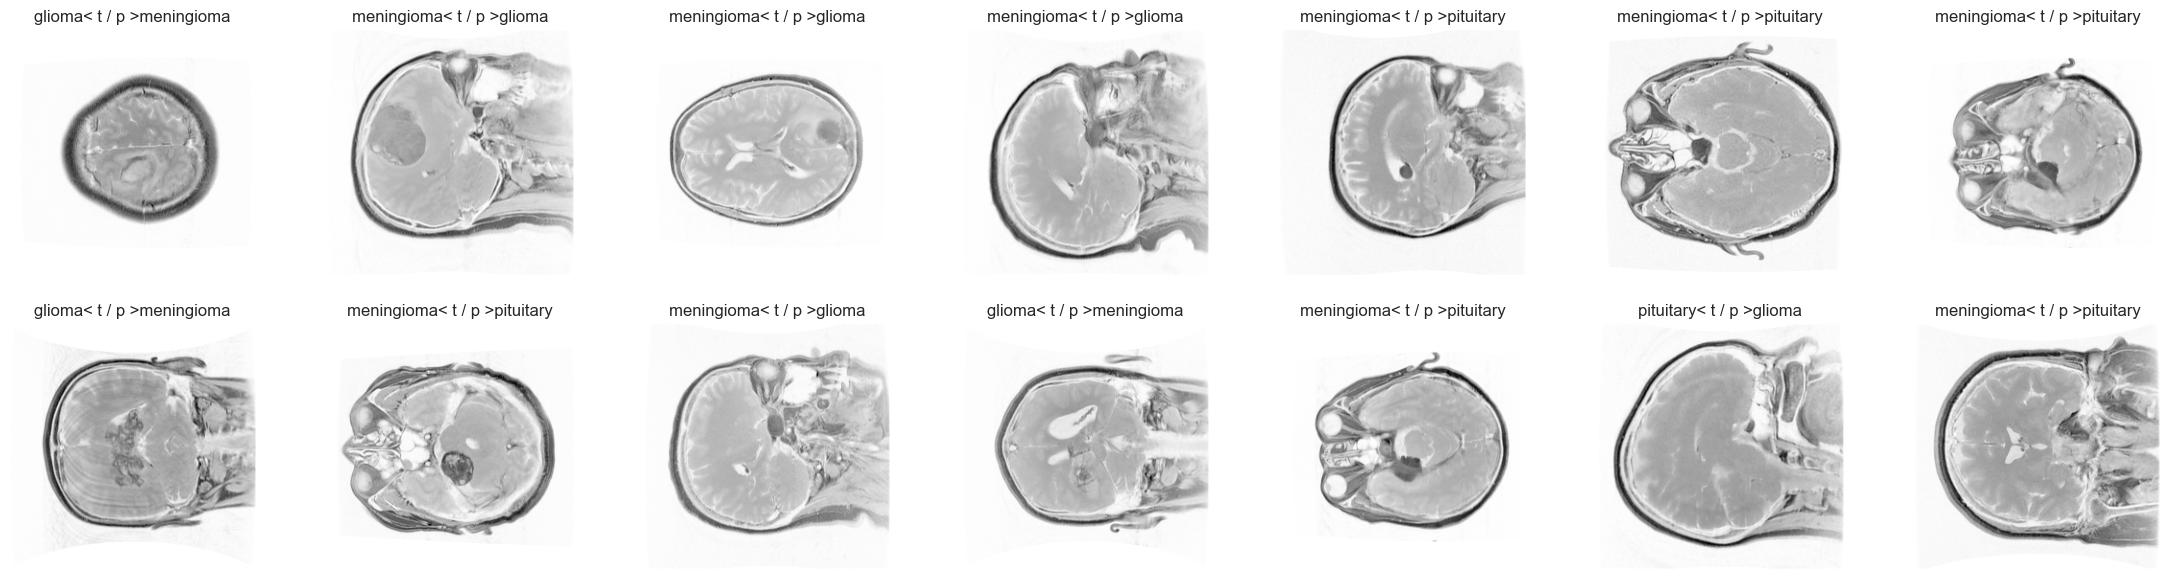

In [68]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(28, 7))
axes = axes.flatten()

for i, i_2 in enumerate(wrong):
    axes[i].imshow(all_images[i_2], cmap='gray_r')
    axes[i].set_axis_off()
    axes[i].set_title(label_names[y_true[i_2]] + '< t / p >' + label_names[y_pred[i_2]])
    print(y_true[i_2], y_pred[i_2])

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_true, y_pred, target_names=label_names)
print(report)

              precision    recall  f1-score   support

      glioma       0.97      0.98      0.97       143
  meningioma       0.95      0.86      0.91        72
   pituitary       0.94      0.99      0.96        93

    accuracy                           0.95       308
   macro avg       0.95      0.94      0.95       308
weighted avg       0.95      0.95      0.95       308



In [71]:
import numpy as np
import matplotlib.pyplot as plt
masks = np.random.randint(0, 2, (10, 100, 100, 1))

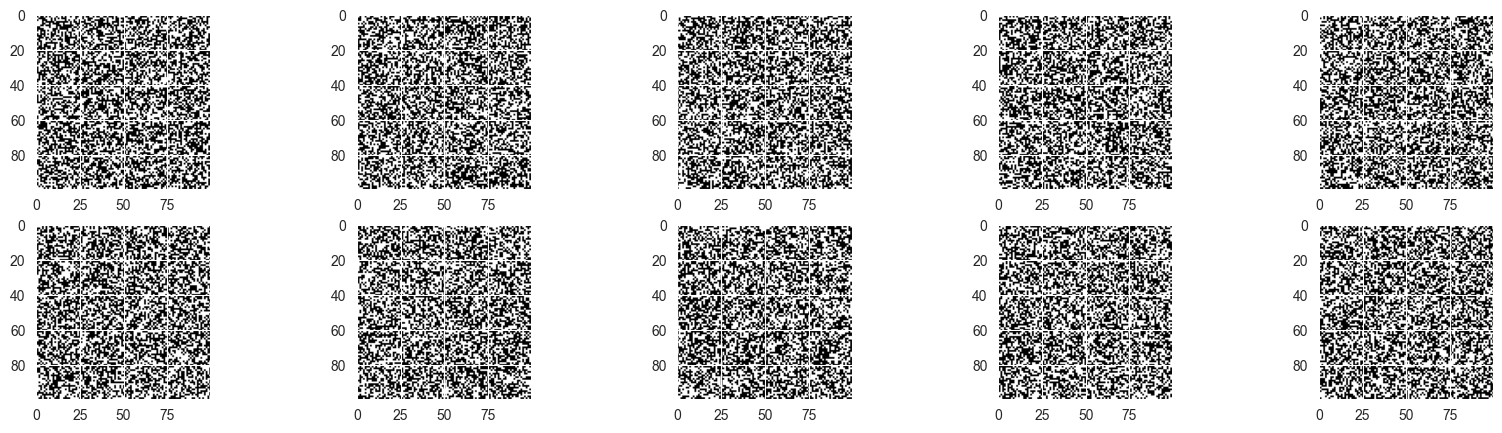

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))
axes = axes.flatten()

for i, mask in enumerate(masks):
    axes[i].imshow(mask, cmap='gray_r')
    
